# Book Recommender System

In [1]:
# import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
users_data = pd.read_csv('Users.csv')
books_data = pd.read_csv('Books.csv')
ratings_data = pd.read_csv('Ratings.csv')

In [3]:
# checking dimentions of the datasets
users_data.shape,books_data.shape,  ratings_data.shape

((278858, 3), (271360, 8), (1149780, 3))

In [4]:
# check the head of the users data
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
# check the head of the books data
books_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
# check the head of the ratings data
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
# Checking for null values in users data
users_data.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [8]:
# Checking for null values in books data
books_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
# Checking for null values in ratings data
ratings_data.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### Checking for duplicates

In [10]:
books_data.duplicated().sum(), users_data.duplicated().sum(), ratings_data.duplicated().sum()

(0, 0, 0)

In [11]:
pd.set_option('max_colwidth', 400)

In [12]:
books_data['Publisher'] = books_data['Publisher'].replace(np.nan,'Others')
books_data['Book-Author'] = books_data['Book-Author'].replace(np.nan,'Others')


In [13]:
books_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [14]:
books_data[books_data.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [15]:
books_data.loc[books_data['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [16]:
books_data.loc[(books_data['ISBN'] == '078946697X'),'Year-Of-Publication']=2000
books_data.loc[(books_data['ISBN'] == '078946697X'),'Book-Author']= 'Michael Teitelbaum'
books_data.loc[(books_data['ISBN'] == '078946697X'),'Publisher']= 'DK Publishing Inc'
books_data.loc[(books_data['ISBN'] == '078946697X'),'Book-Title']= 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers'
books_data.loc[(books_data['ISBN'] == '078946697X'),'Image-URL-S']='http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
books_data.loc[(books_data['ISBN'] == '078946697X'),'Image-URL-M']='http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
books_data.loc[(books_data['ISBN'] == '078946697X'),'Image-URL-L']='http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'

books_data.loc[(books_data['ISBN'] == '0789466953'),'Year-Of-Publication']=2000
books_data.loc[(books_data['ISBN'] == '0789466953'),'Book-Author']= 'James Buckley'
books_data.loc[(books_data['ISBN'] == '0789466953'),'Publisher']= 'DK Publishing Inc'
books_data.loc[(books_data['ISBN'] == '0789466953'),'Book-Title']= 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers'
books_data.loc[(books_data['ISBN'] == '0789466953'),'Image-URL-S']='http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
books_data.loc[(books_data['ISBN'] == '0789466953'),'Image-URL-M']='http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
books_data.loc[(books_data['ISBN'] == '0789466953'),'Image-URL-L']='http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'



In [17]:
books_data.loc[books_data['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [18]:
books_data.loc[(books_data['ISBN'] == '2070426769'),'Year-Of-Publication']=2003
books_data.loc[(books_data['ISBN'] == '2070426769'),'Book-Author']= 'Jean-Marie Gustave Le ClÃ?Â©zio'
books_data.loc[(books_data['ISBN'] == '2070426769'),'Publisher']= 'Gallimard'
books_data.loc[(books_data['ISBN'] == '2070426769'),'Book-Title']= 'Peuple du ciel, suivi de Les Bergers'
books_data.loc[(books_data['ISBN'] == '2070426769'),'Image-URL-S']='http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
books_data.loc[(books_data['ISBN'] == '2070426769'),'Image-URL-M']='http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
books_data.loc[(books_data['ISBN'] == '2070426769'),'Image-URL-L']='http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'




In [19]:

books_data.iloc[[220731,209538,221678],:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg


In [20]:
users_data['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [21]:
users_data.loc[(users_data['Age'] > 95) | (users_data['Age'] < 5),'Age'] = np.nan
users_data['Age'] = round(users_data['Age'].fillna(users_data['Age'].mean()))
users_data['Age'].isnull().sum()

0

In [22]:
# On the basis of ISBN Column which is common in both the datset
books_ratings_with_name = ratings_data.merge(books_data, on='ISBN') 
print(books_ratings_with_name.shape) 
print(books_ratings_with_name.columns)


(1031136, 10)
Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')


In [23]:
books_ratings_users = books_ratings_with_name.merge(users_data, on='User-ID')
books_ratings_users

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,"tyler, texas, usa",35.0
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.LZZZZZZZ.jpg,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.LZZZZZZZ.jpg,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.LZZZZZZZ.jpg,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2862749796.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2862749796.01.LZZZZZZZ.jpg,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslager Kislau,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3788097000.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3788097000.01.LZZZZZZZ.jpg,"stuttgart, \n/a\""., germany""",35.0
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories: And Other Holiday Stories,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553571001.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553571001.01.LZZZZZZZ.jpg,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.LZZZZZZZ.jpg,"arlington heights, illinois, usa",13.0


In [24]:
books_ratings_users['Year-Of-Publication'].astype(str).astype(int)

0          2002
1          2002
2          1986
3          1994
4          1996
           ... 
1031131    2002
1031132    1984
1031133    2001
1031134    1998
1031135    1985
Name: Year-Of-Publication, Length: 1031136, dtype: int64

## Exploratory Data Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Agatha Christie'),
  Text(1, 0, 'William Shakespeare'),
  Text(2, 0, 'Stephen King'),
  Text(3, 0, 'Ann M. Martin'),
  Text(4, 0, 'Carolyn Keene'),
  Text(5, 0, 'Francine Pascal'),
  Text(6, 0, 'Isaac Asimov'),
  Text(7, 0, 'Nora Roberts'),
  Text(8, 0, 'Barbara Cartland'),
  Text(9, 0, 'Charles Dickens')])

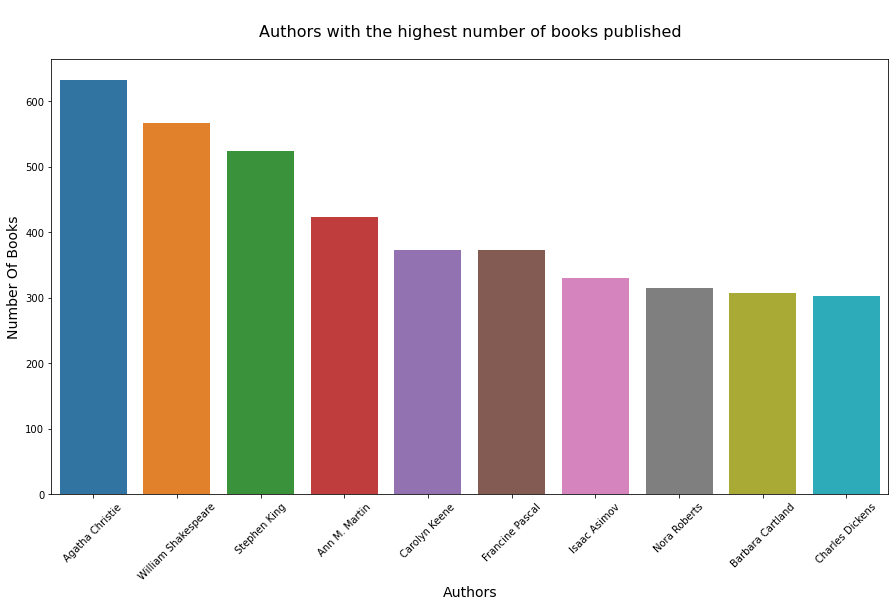

In [25]:
top10_authors = books_data['Book-Author'].value_counts().head(10)
plt.figure(figsize = (15,8))
sns.barplot(x= top10_authors.index, y= top10_authors)
plt.title('\nAuthors with the highest number of books published\n',size=16)
plt.ylabel('Number Of Books',size=14)
plt.xlabel('Authors',size=14)
plt.xticks(rotation=45)

This Bar graph represents the Author who has published the highest number of books and we can observe that Agatha Christie published the highest number of books around 650 followed by William Shakespeare around 570 books. Agatha Christie and Stephen King wrote Crime genre novels maybe we can conclude that crime fiction novels were the highest published out of all genres. 

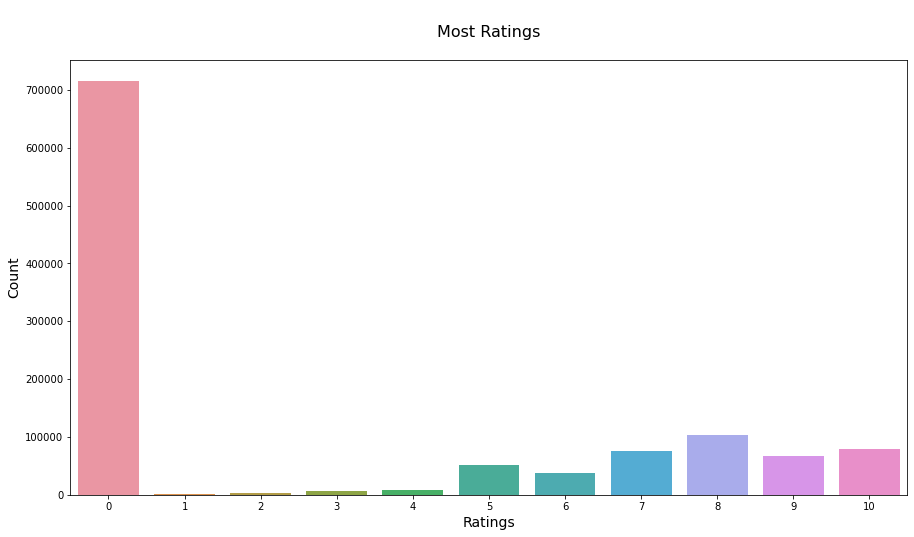

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(data = ratings_data, x = 'Book-Rating')
plt.title('\nMost Ratings\n',size=16)
plt.xlabel('Ratings',size = 14)
plt.ylabel('Count', size = 14)
plt.show()

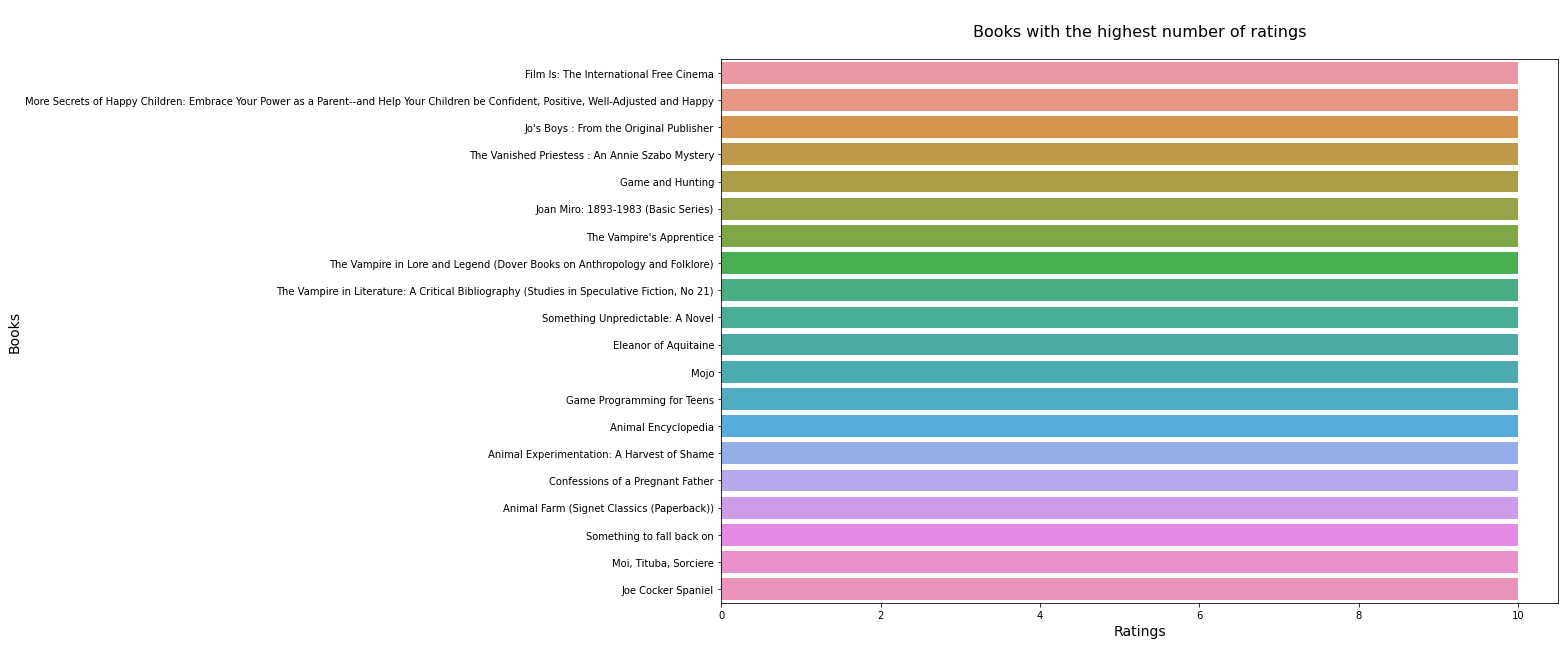

In [27]:
# Books with the highest number of ratings
Top_rated_books = books_ratings_users.groupby('Book-Title')['Book-Rating'].mean().reset_index().sort_values(['Book-Rating'], ascending=False).head(20)
plt.figure(figsize = (15,10))
sns.barplot(y= Top_rated_books['Book-Title'], x= Top_rated_books['Book-Rating'])
plt.title('\nBooks with the highest number of ratings\n',size=16)
plt.xlabel('Ratings',size=14)
plt.ylabel('Books',size=14)
plt.show()

This represents the books with the highest number of ratings. These shows the few of the top-rated books like Film Is: The International Free Cinema, More Secrets of happy children, Jo’s boys. 

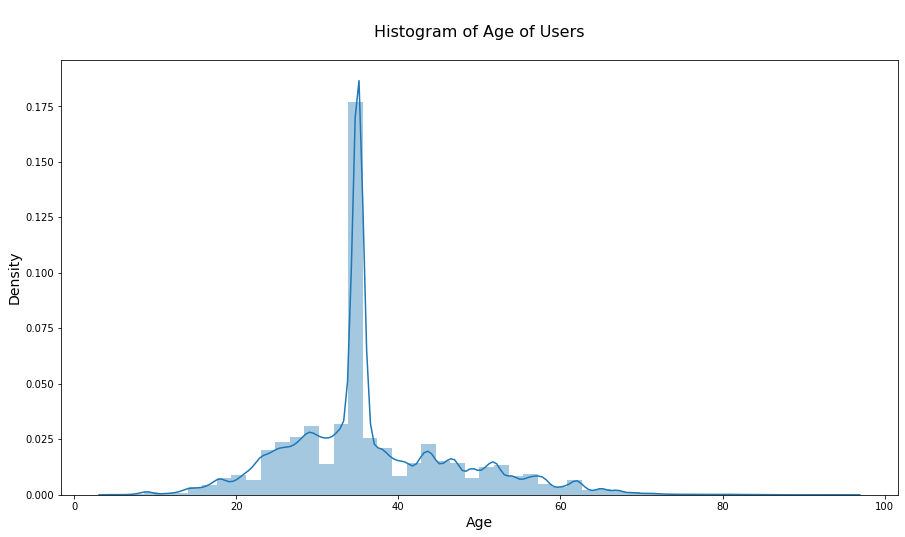

In [28]:
# Identifying the most common user age group
fig=plt.figure(figsize=(15,8))
sns.distplot(books_ratings_users['Age'])
plt.xlabel('Age',size=14)
plt.ylabel('Density',size=14)
plt.title('\nHistogram of Age of Users\n',size=16)
plt.show()

This histogram represents the age of users. We can observe that most users' age was in the range of 20 to 60. We can also observe that users around age 30 show interest in reading books compared to other age groups. 

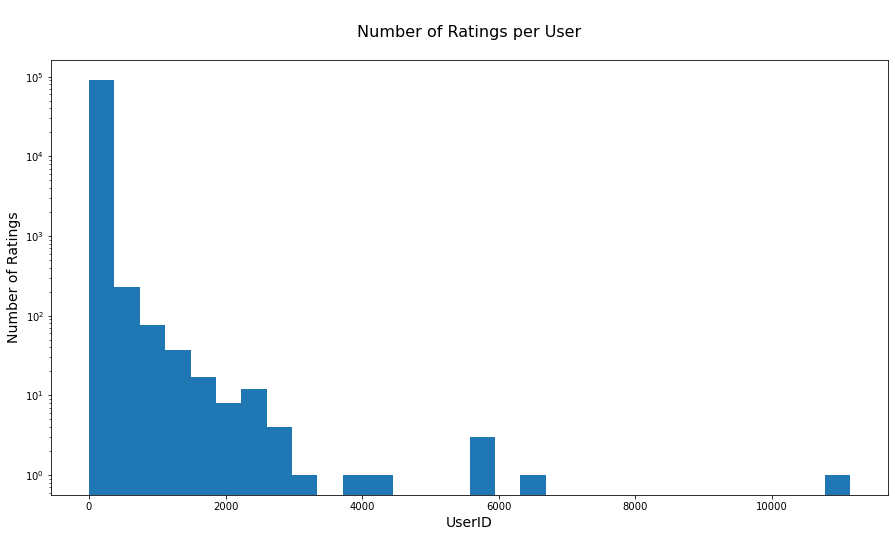

In [29]:
# Number of ratings per user
fig=plt.figure(figsize=(15,8))
plt.hist(books_ratings_users.groupby(by='User-ID')['Book-Rating'].count(),bins=30, log=True)
plt.title('\nNumber of Ratings per User\n',size=16)
plt.xlabel('UserID',size=14)
plt.ylabel('Number of Ratings',size=14)
plt.show()

The highest number of ratings was given by the User ID between 0 and 3000. User ID's between 6400 and 10400 didn't rate any of the books or negligible. We can conclude that around 4000 users were giving ratings for the books they read. 

-------------------------------------------------------------------------------------------------------------------
ISBN: 270151 unique values


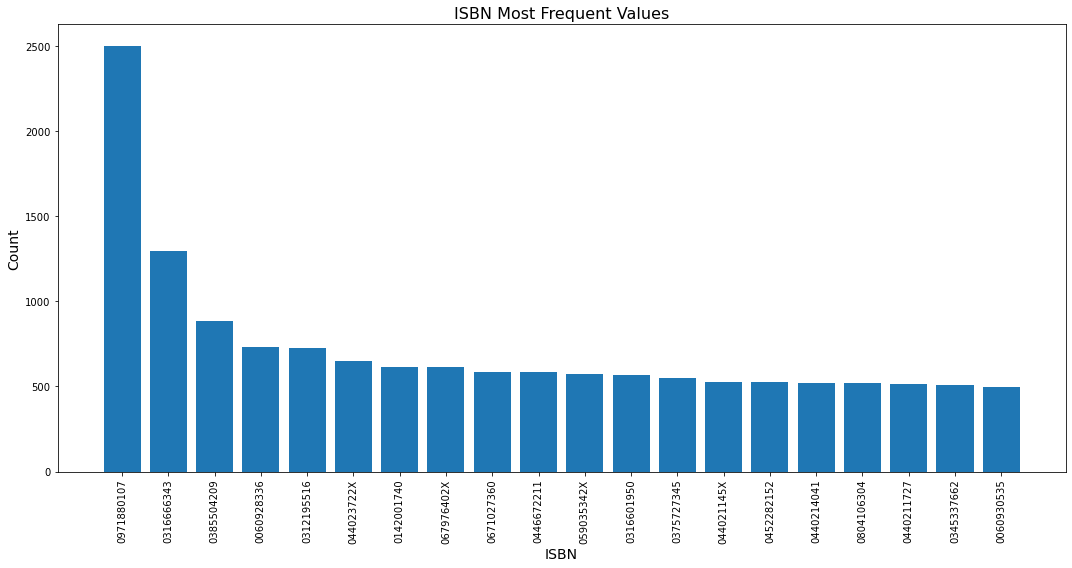

Top-20 most frequent values:
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0142001740     615
067976402X     614
0671027360     586
0446672211     585
059035342X     571
0316601950     568
0375727345     552
044021145X     529
0452282152     526
0440214041     523
0804106304     519
0440211727     517
0345337662     506
0060930535     494
Name: ISBN, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Book-Author: 101587 unique values


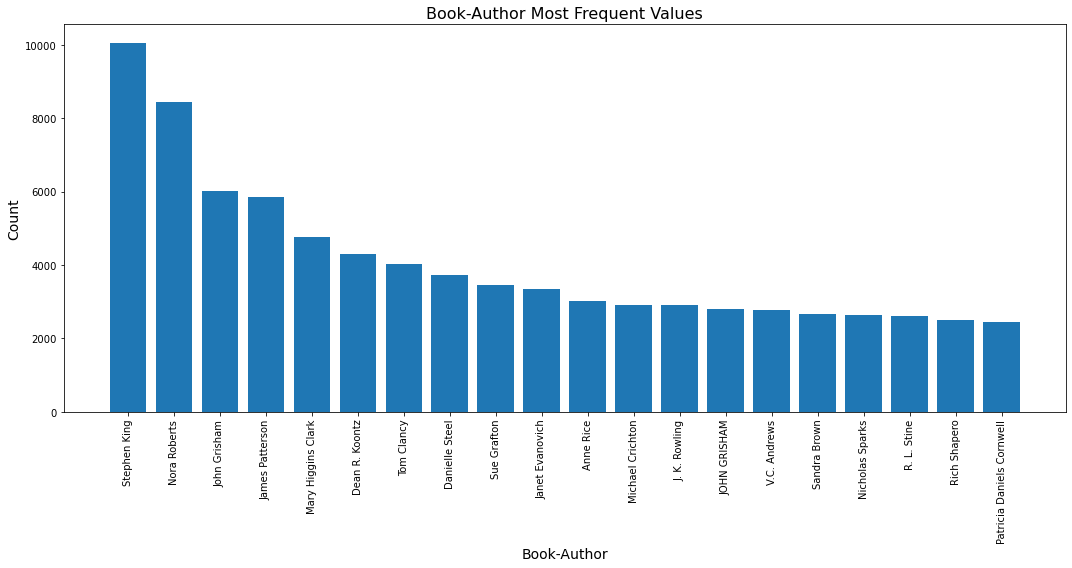

Top-20 most frequent values:
Stephen King                 10053
Nora Roberts                  8429
John Grisham                  6010
James Patterson               5845
Mary Higgins Clark            4777
Dean R. Koontz                4313
Tom Clancy                    4036
Danielle Steel                3726
Sue Grafton                   3457
Janet Evanovich               3350
Anne Rice                     3030
Michael Crichton              2921
J. K. Rowling                 2908
JOHN GRISHAM                  2808
V.C. Andrews                  2785
Sandra Brown                  2663
Nicholas Sparks               2650
R. L. Stine                   2606
Rich Shapero                  2502
Patricia Daniels Cornwell     2461
Name: Book-Author, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Publisher: 16727 unique values


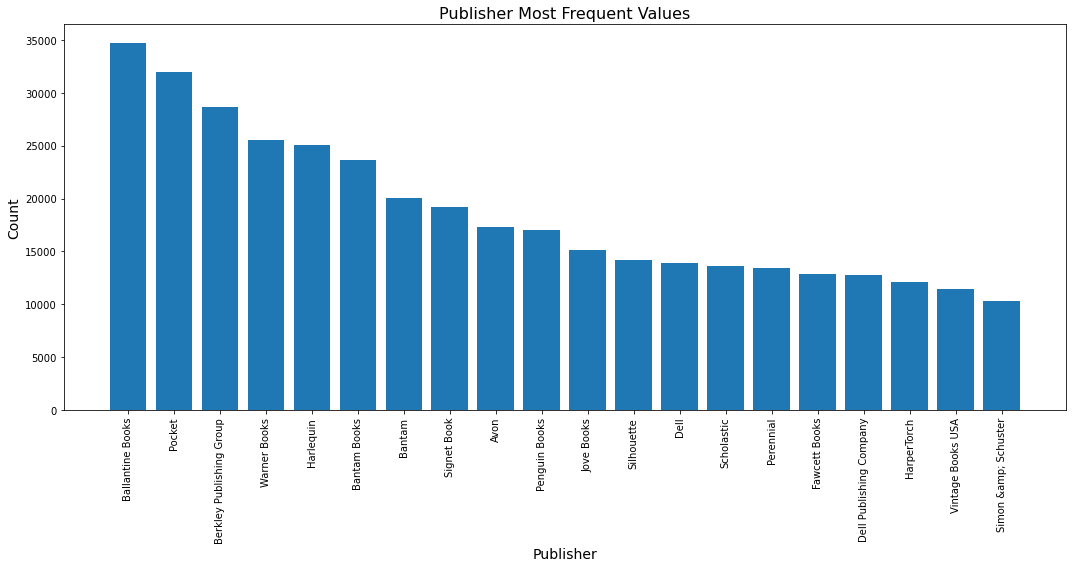

Top-20 most frequent values:
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Jove Books                  15178
Silhouette                  14184
Dell                        13916
Scholastic                  13662
Perennial                   13466
Fawcett Books               12905
Dell Publishing Company     12733
HarperTorch                 12081
Vintage Books USA           11426
Simon &amp; Schuster        10318
Name: Publisher, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Book-Title: 241071 unique values


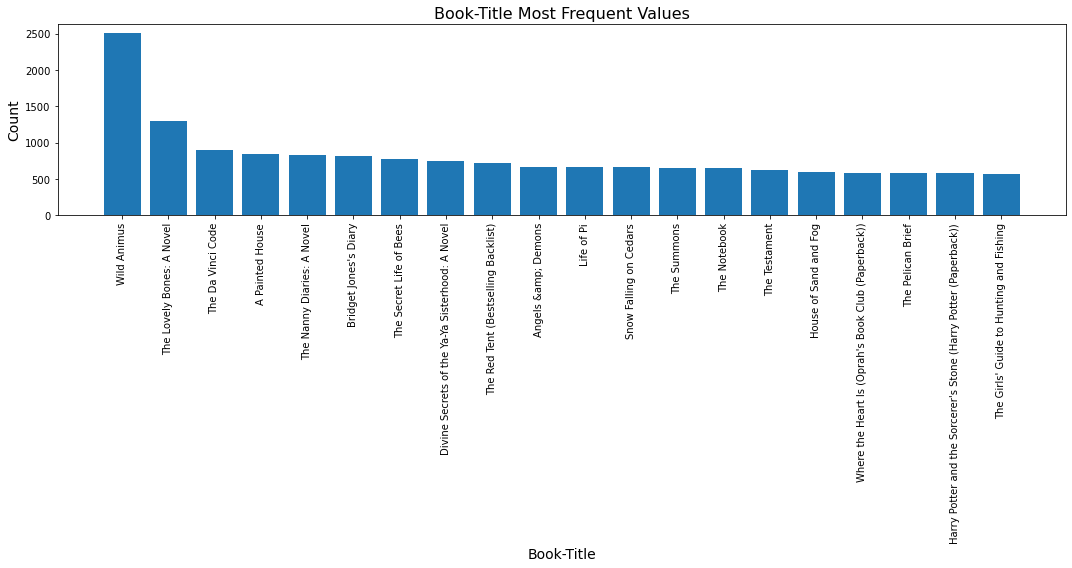

Top-20 most frequent values:
Wild Animus                                                         2502
The Lovely Bones: A Novel                                           1295
The Da Vinci Code                                                    898
A Painted House                                                      838
The Nanny Diaries: A Novel                                           828
Bridget Jones's Diary                                                815
The Secret Life of Bees                                              774
Divine Secrets of the Ya-Ya Sisterhood: A Novel                      740
The Red Tent (Bestselling Backlist)                                  723
Angels &amp; Demons                                                  670
Life of Pi                                                           664
Snow Falling on Cedars                                               662
The Summons                                                          655
The Notebook          

In [30]:
# Content analysis
for col in ('ISBN', 'Book-Author', 'Publisher', 'Book-Title'):
    print('-' * 115)
    print(f'{col}: {books_ratings_users[col].nunique()} unique values')
    counts = books_ratings_users[col].value_counts().nlargest(20)
    fig=plt.figure(figsize=(15,8))
    plt.bar(counts.index, counts.values)
    plt.xticks(rotation=90)
    plt.title(f'{col} Most Frequent Values',size = 16)
    plt.xlabel(f'{col}',size=14)
    plt.ylabel('Count',size=14)
    plt.tight_layout()
    plt.show()
    print('Top-20 most frequent values:')
    print(counts)

From this graph, we can see the top most 20 frequent values of ISBN, Book-author,Publisher and book title. The most frequent book was with ISBN 0971880107 followed by 0316666343 and the most popular author was Stephen King followed by Nora Roberts. The most frequent publisher was Ballantine Books who published 34724 books. Wild Animus was the top most book appeared followed by The Lovely Bones.

# Model Building- Recommendation System


In [31]:
number_of_ratings_df = books_ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index() # gives number of rating for each book.
# print(number_of_ratings_df)
#Renaming the Book-rating column to number of column
number_of_ratings_df.rename(columns ={'Book-Rating':'number_of_ratings'},inplace = True )
number_of_ratings_df



,Book-Title,number_of_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [32]:
# Calculating average rating
Average_ratings_df = books_ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index() # gives number of rating for each book.
Average_ratings_df.rename(columns ={'Book-Rating':'average_ratings'},inplace = True )
Average_ratings_df


,Book-Title,average_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [33]:
popularity_df = number_of_ratings_df.merge(Average_ratings_df, on ='Book-Title')
popularity_df

,Book-Title,number_of_ratings,average_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [34]:
# Displaying books which have atleast 250 ratings.
popularity_df= popularity_df[popularity_df['number_of_ratings']>=250].sort_values('average_ratings',ascending = False).head(50)

popularity_df

,Book-Title,number_of_ratings,average_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Book 5),347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lord of the Rings,281,5.007117
187377,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [35]:
# popularity_df.shape (50, 3)
# print(books_data.columns)

popularity_df = popularity_df.merge(books_data, on = 'Book-Title')



In [36]:
popularity_df = popularity_df.drop_duplicates("Book-Title")[['Book-Title','Book-Author', 'Image-URL-M','number_of_ratings','average_ratings']]
popularity_df                                                            
                                                             

,Book-Title,Book-Author,Image-URL-M,number_of_ratings,average_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg,278,5.737410
9,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.01.MZZZZZZZ.jpg,281,5.007117
17,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.01.MZZZZZZZ.jpg,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg,510,4.700000


# Collaborative Filtering Based Recommender System

In [37]:
 # users > 200 ratings(those user who has given more than 200 ratings)
# books > 50 ratings(those books which has ratings over 50)
X = books_ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
users_with_200_ratings = X[X].index
users_with_200_ratings

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [38]:
 filtered_ratings = books_ratings_with_name[books_ratings_with_name['User-ID'].isin(users_with_200_ratings)]

In [39]:
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating']>=50
popular_books = y[y].index

In [40]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(popular_books)]
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0531001725.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0531001725.01.LZZZZZZZ.jpg
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0670809381.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0670809381.01.LZZZZZZZ.jpg
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440910927.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440910927.01.LZZZZZZZ.jpg
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/B0001PIOX4.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/B0001PIOX4.01.LZZZZZZZ.jpg


In [41]:
p_table =  final_ratings.pivot_table(index = 'Book-Title', columns = "User-ID", values = "Book-Rating")
p_table.fillna(0, inplace = True)
p_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
score = cosine_similarity(p_table)
score[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [44]:
def recommender_system(book_name):
    index = np.where(p_table.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(score[index])), key = lambda x :x[1], reverse = True)[1:6]
    for i in similar_items:
        print(p_table.index[i[0]])

In [45]:
recommender_system('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [46]:
recommender_system('The Handmaid\'s Tale')

Bastard Out of Carolina
A Civil Action
1984
The Kitchen God's Wife
The Red Tent (Bestselling Backlist)
